# Example usage of `glycoproteomics` library

This will show some usage examples for manipulating spectra and calling peaks.

In [1]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in spectrum from one of the known control samples.

In [2]:
spectrum = glycoproteomics.io.read_spectrum_file(
    os.path.join("tests", "data", "spectrum.txt.gz")
)
ions = glycoproteomics.spectrum.list_ions(spectrum)
print(ions)

['138.055', '144.066', '168.066', '186.076', '204.087', '243.026', '274.092', '292.103', '308.098', '366.139', '405.079', '485.046', '512.197', '657.235']


Plot the spectra.

In [3]:
rt_x_bin_size = 0.02
mz_y_bin_size = 2.0

binned_spectrum = glycoproteomics.spectrum.bin(
    spectrum,
    rt_x_bin_size,
    mz_y_bin_size,
    np.mean
)

In [4]:
with open('test_bin.tsv', 'w') as out:
    out.write('\t'.join(["RT", "MZ"] + ions) + '\n')
    for rt, rt_dict in binned_spectrum.items():
        for mz, mz_dict in rt_dict.items():
            out.write('\t'.join([str(i) for i in [rt, mz] + [mz_dict[ion] for ion in ions]]) + '\n')

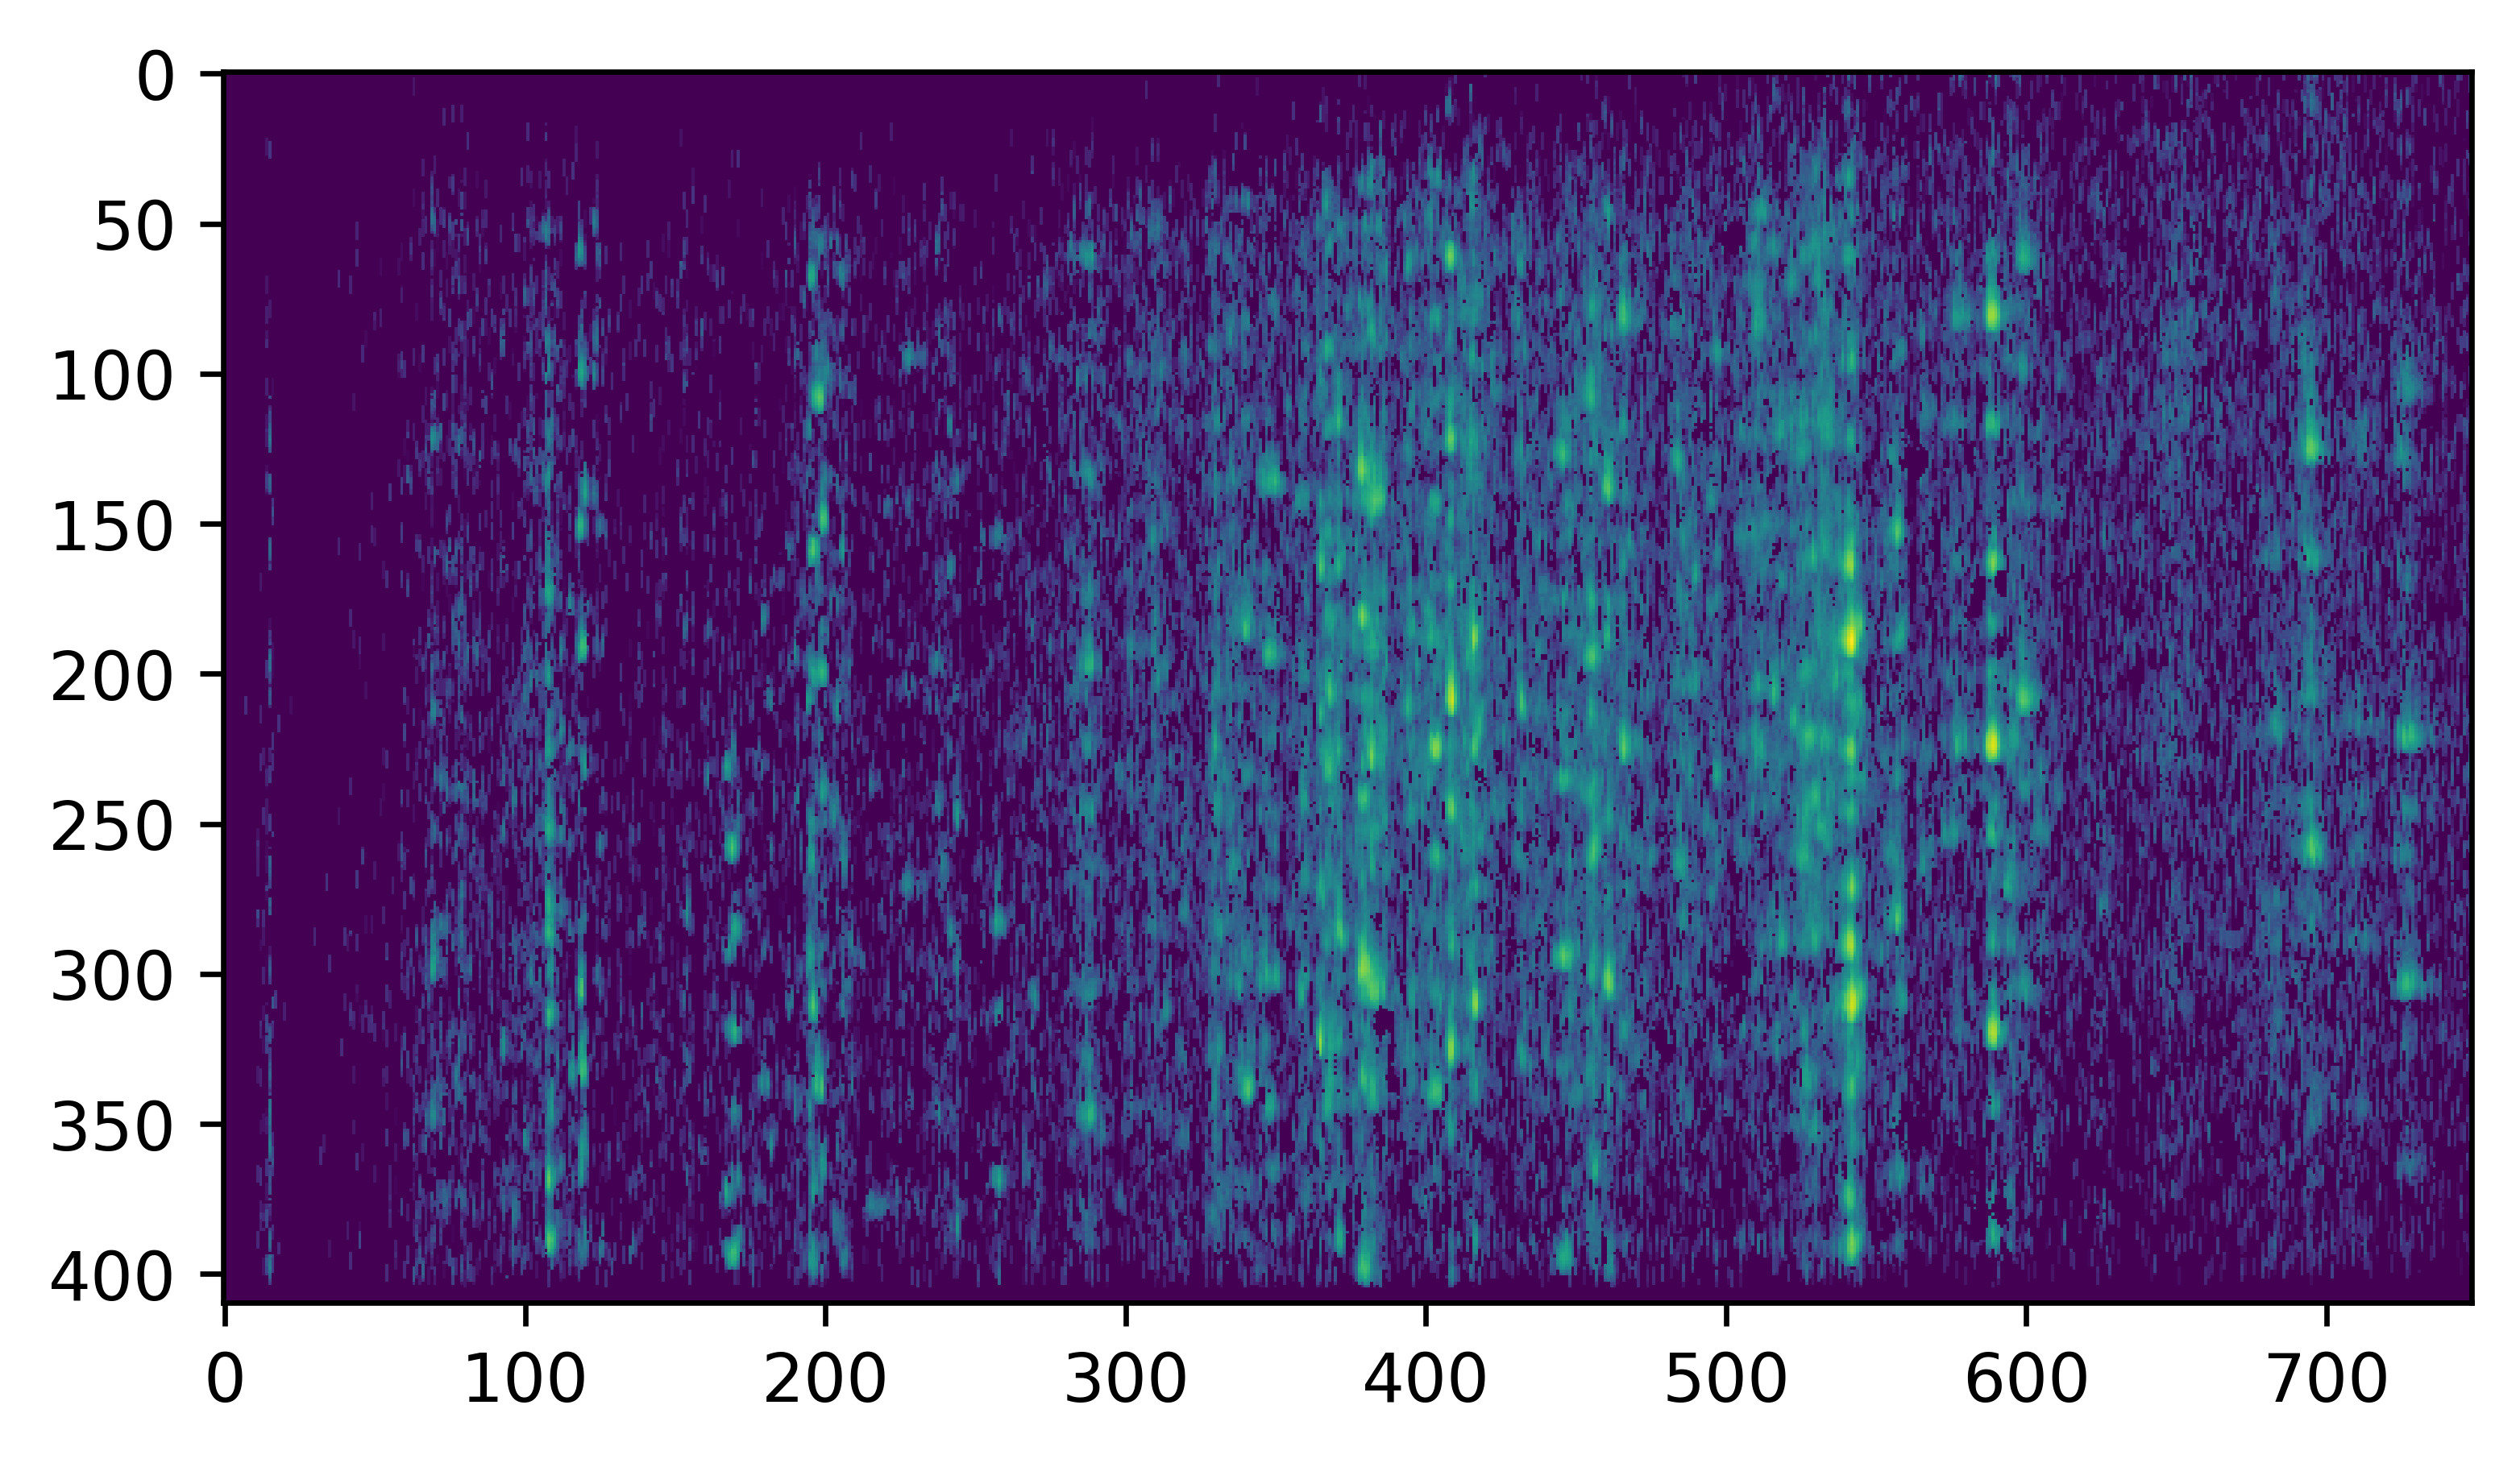

In [5]:
ion = ions[0]
ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(binned_spectrum, ion)
plt.figure(dpi=600)
glycoproteomics.plotting.plot_ion_matrix(ion_matrix)